In [69]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(seed=42)

In [70]:
def my_paa(T, w):
    # created just to test around for a while
    n = len(T)
    # TODO: cut T if n is divisble by w
    return [np.mean(T[n//w*(i-1)+1:n//w*i+1]) for i in range(1, w+1)]

def get_sax_symbol_frequency(word):
    return {key: word.count(key) for key in set(word)}

W = 8
N = 20 * W

xs = range(N)
ts = np.array([4*np.exp(0.005 * (x + np.random.normal(0, 3))) for x in xs])    # example timeseries: exponential
# ts = 4 * np.linspace(-3, 100, N)    # example timeseries: linear

In [73]:
from saxpy.znorm import znorm
from saxpy.paa import paa
from saxpy.sax import ts_to_string
from saxpy.alphabet import cuts_for_asize # alphabet size

A = 4

# normalize timeseries so that breakpoints can be determined by N(0, 1) Gaussian
ts_normed = znorm(ts)
# perform PAA
ts_paa = paa(ts_normed, W)
# convert PAA reduced timeseries to SAX representation using A letters
word = ts_to_string(ts_paa, cuts_for_asize(A))
print(f"SAX representation of the timeseries: {word}")
print(f"frequencies of letters: {get_sax_symbol_frequency(word)}")

SAX representation of the timeseries: aaabccdd
frequencies of letters: {'a': 3, 'c': 2, 'd': 2, 'b': 1}


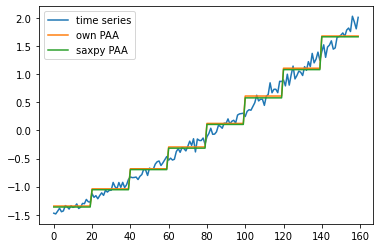

In [74]:
# TODO: LOW PRIORITY. maybe check why implementations differ. 

# plot time series and compare own and saxpy PAA version
plt.plot(range(len(ts)), ts_normed, label="time series")
plt.plot(range(len(ts)), np.repeat(my_paa(ts_normed, W), N//W), label="own PAA")
plt.plot(range(len(ts)), np.repeat(paa(ts_normed, W), N//W), label="saxpy PAA")
plt.legend()